CLOZUK_SCZ_2018_withPGC_vs_SSGAC_EDU_2018_no23andMe.test.json
cost(min_overlap)=158.5590488560847, cost(max_overlap)=0.18516215804265812, cost(best_cost)=0.0
best_vs_min_overlap: BIC=305.5119775136015, AIC=315.1180977121694
best_vs_max_overlap: BIC=-11.235795882482615, AIC=-1.6296756839146838

SSGAC_EDU_2018_no23andMe_vs_CLOZUK_SCZ_2018_withPGC.test.json
cost(min_overlap)=158.7662043858436, cost(max_overlap)=0.006252543709706515, cost(best_cost)=0.0
best_vs_min_overlap: BIC=305.9262885731193, AIC=315.5324087716872
best_vs_max_overlap: BIC=-11.593615111148518, AIC=-1.987494912580587


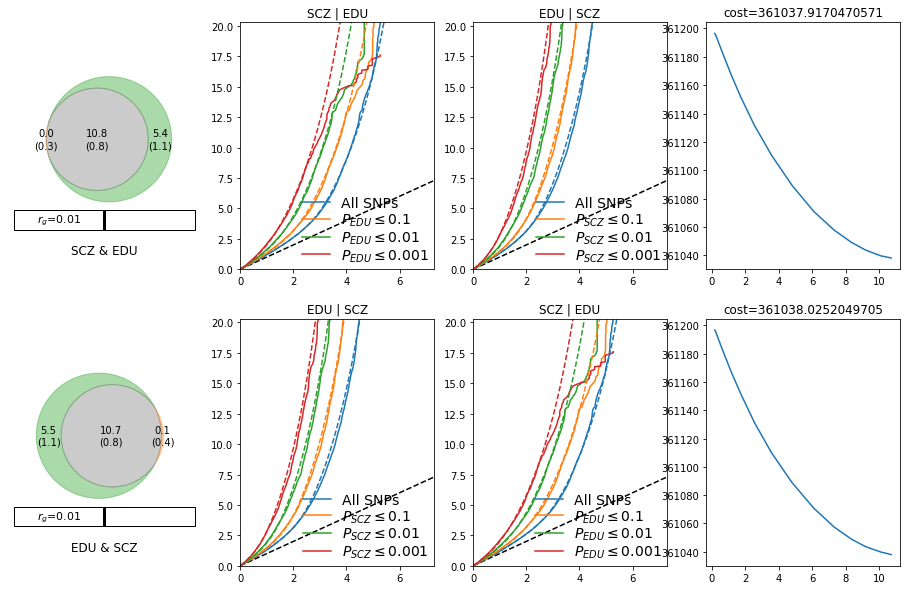

In [20]:
import matplotlib.pyplot as plt
import json
import sys
import numpy as np
sys.path.insert(1,'/home/oleksanf/github/mixer')
import precimed
import precimed.mixer
import precimed.mixer.figures
from precimed.mixer.figures import make_venn_plot
from precimed.mixer.figures import make_strat_qq_plots
from precimed.mixer.utils import BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO
from precimed.mixer.utils import _calculate_bivariate_uncertainty_funcs
from precimed.mixer.utils import UnivariateParams
from precimed.mixer.utils import BivariateParams
ylim=20.3; xlim=7.3;
plt.figure(figsize=[16, 10])
traitA = 'CLOZUK_SCZ_2018_withPGC';        nameA ='SCZ'; colorA=1;       traitB = 'SSGAC_EDU_2018_no23andMe'; nameB = 'EDU'; colorB=2;

def describe(data):
    cost_n = data['options']['sum_weights']
    df_diff = -1  # fitting polygenic overlap require 1 extra parameter

    min_overlap = data['optimize'][2][1]['Jout'][0]
    max_overlap = data['optimize'][2][1]['Jout'][-1]
    best_cost = data['optimize'][-1][1]['fun']
    offset = np.min([min_overlap, max_overlap, best_cost])
    print('cost(min_overlap)={}, cost(max_overlap)={}, cost(best_cost)={}'.format(min_overlap-offset, max_overlap-offset, best_cost-offset))

    best_vs_min_BIC = np.log(cost_n) * df_diff + 2 * (min_overlap - best_cost) 
    best_vs_min_AIC =              2 * df_diff + 2 * (min_overlap - best_cost) 

    best_vs_max_BIC = np.log(cost_n) * df_diff + 2 * (max_overlap - best_cost) 
    best_vs_max_AIC =              2 * df_diff + 2 * (max_overlap - best_cost) 

    print('best_vs_min_overlap: BIC={}, AIC={}'.format( best_vs_min_BIC, best_vs_min_AIC))
    print('best_vs_max_overlap: BIC={}, AIC={}'.format(best_vs_max_BIC, best_vs_max_AIC))

def extract_likelihood_function(data):
    funcs, stats = _calculate_bivariate_uncertainty_funcs(alpha=0.05, totalhet=data['options']['totalhet'], num_snps=data['options']['num_snp'])
    p=data['params']; params=BivariateParams(pi=p['pi'],sig2_beta=p['sig2_beta'], rho_beta=p['rho_beta'],sig2_zero=p['sig2_zero'],rho_zero=p['rho_zero'])
    parametrization = BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO(lib=None, const_params1=params._params1(), const_params2=params._params2(), const_rg=params._rg(), const_rho_zero=params._rho_zero)
    return [dict(funcs)['nc12@p9'](parametrization.vec_to_params([x])) for x in data['optimize'][2][1]['grid']], data['optimize'][2][1]['Jout']

folder ='/home/oleksanf/vmshare/data/mixer_shahram/bivaiate_out'
fname = folder+"/{}_vs_{}.test.json".format(traitA, traitB)
data = json.loads(open(fname).read())
plt.subplot(2,4,1); make_venn_plot(data, flip=False, max_size=22, traits=[nameA, nameB], colors=[colorA, colorB])
plt.subplot(2,4,2); make_strat_qq_plots(data, traits=[nameA, nameB]); plt.ylim(0, ylim); plt.xlim(0, xlim);
plt.subplot(2,4,3); make_strat_qq_plots(data, traits=[nameB, nameA], flip=True); plt.ylim(0, ylim); plt.xlim(0, xlim);
data = json.loads(open(folder + "/{}_vs_{}.json".format(traitA, traitB)).read())

like_x, like_y = extract_likelihood_function(data)
plt.subplot(2,4,4); plt.plot(np.array(like_x)/1000, like_y)
plt.title('cost={}'.format(data['optimize'][-1][1]['fun']))

print(fname.split('/')[-1]); describe(data)

fname = folder + "/{}_vs_{}.test.json".format(traitB, traitA)
data = json.loads(open(fname).read())
plt.subplot(2,4,5); make_venn_plot(data, flip=False, max_size=22, traits=[nameB, nameA], colors=[colorB, colorA])
plt.subplot(2,4,6); make_strat_qq_plots(data, traits=[nameB, nameA]); plt.ylim(0, ylim); plt.xlim(0, xlim); 
plt.subplot(2,4,7); make_strat_qq_plots(data, traits=[nameA, nameB], flip=True); plt.ylim(0, ylim); plt.xlim(0, xlim); 
data = json.loads(open(folder + "/{}_vs_{}.json".format(traitB, traitA)).read())
like_x, like_y = extract_likelihood_function(data)
plt.subplot(2,4,8); plt.plot(np.array(like_x)/1000, like_y)
plt.title('cost={}'.format(data['optimize'][-1][1]['fun']))

print('\n' + fname.split('/')[-1]); describe(data)

plt.savefig('mixer_results.png')
plt.savefig('mixer_results.svg')  

In [5]:
import json
data=json.loads(open('/home/oleksanf/vmshare/data/mixer_test/real_run1/CTG_COG_2018_vs_PGC_BIP_2016.fit.json').read())
data['optimize'][2][1]['grid']

[-4.59511985013459,
 -4.111423023804633,
 -3.627726197474676,
 -3.1440293711447196,
 -2.6603325448147626,
 -2.176635718484806,
 -1.6929388921548494,
 -1.2092420658248924,
 -0.7255452394949358,
 -0.24184841316497874,
 0.24184841316497785,
 0.7255452394949344,
 1.209242065824891,
 1.6929388921548476,
 2.176635718484805,
 2.6603325448147617,
 3.1440293711447183,
 3.627726197474675,
 4.111423023804632,
 4.595119850134588]

In [12]:
for x in data['optimize']:
    if x[0]=='brute1':

diffevo-fast
neldermead-fast
brute1
brent1
